# REGRESSION WITH ONE VARIABLE

#### Get X and Y
#### Split Data
#### Train with Fit
#### Predict 
#### See Differences

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import *
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

### Load BOSTON House Prices Dataset

In [7]:
##LOAD DATA
url = "C:/Users/mateus_silva1/Documents/Data Science/Python Scripts/BostonHousing.csv"
df = pd.read_csv(url)

### Print Correlation Matrix Plot with Seaborn

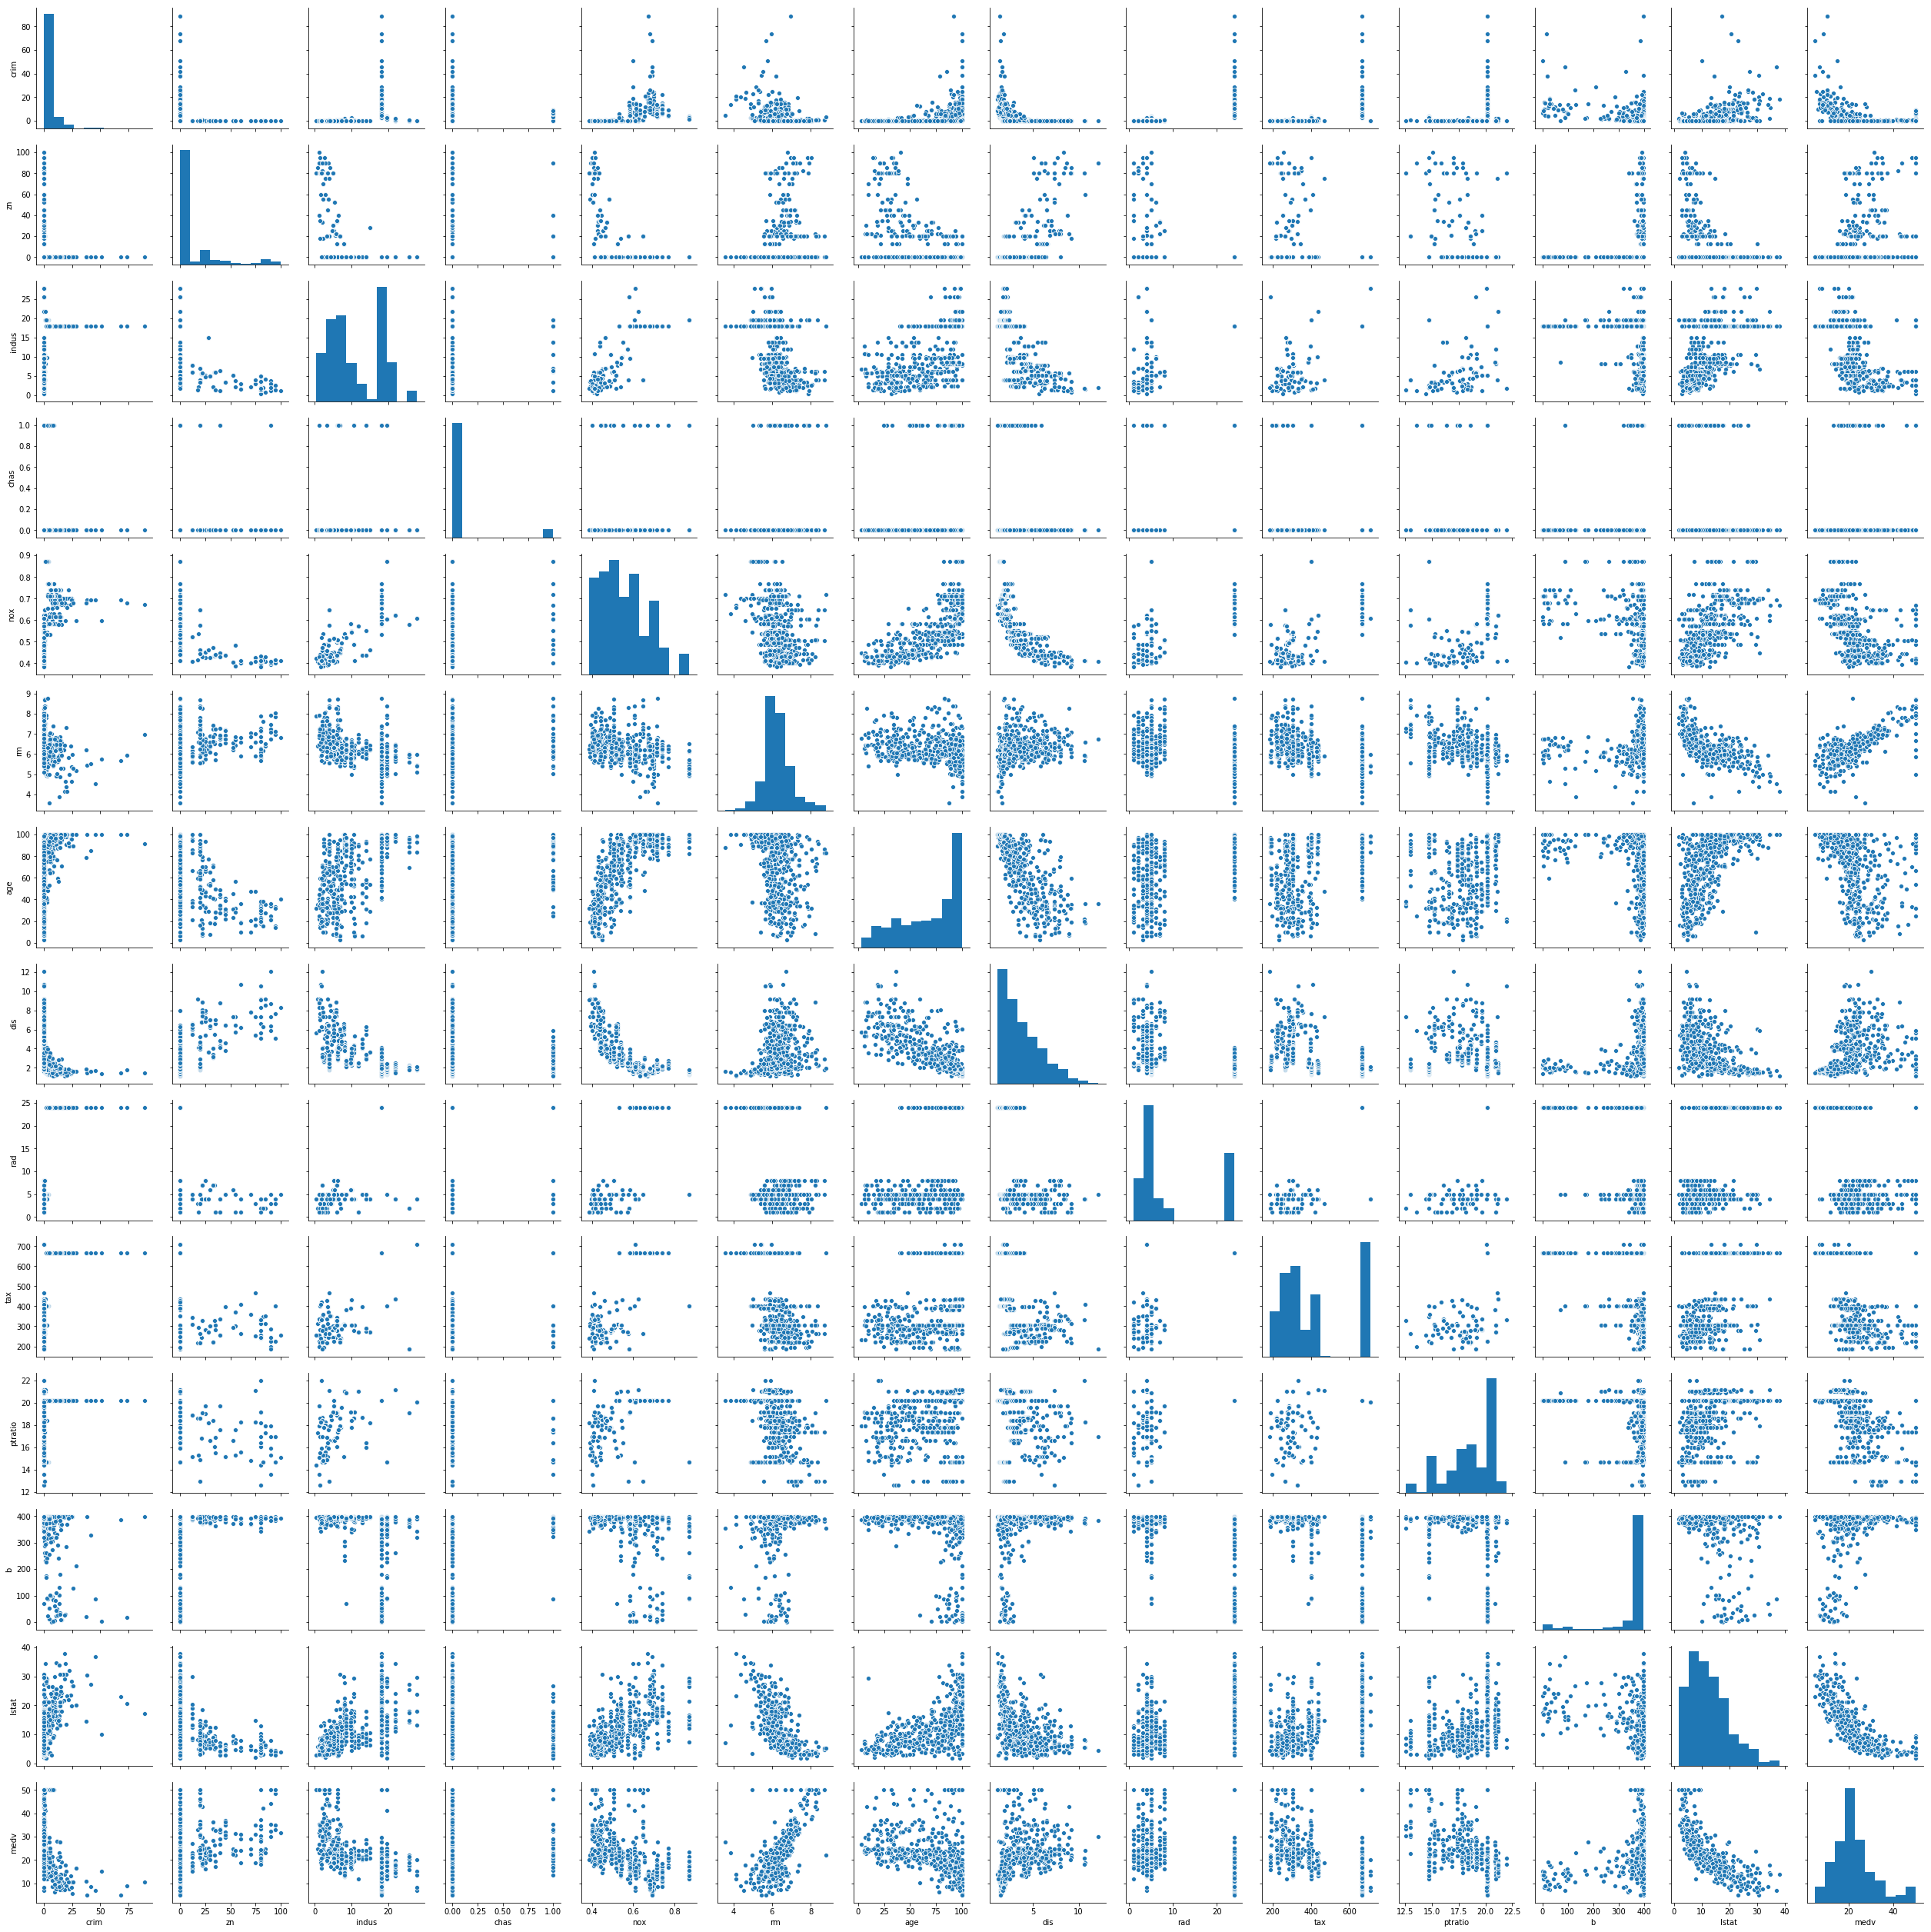

In [8]:
sb.pairplot(df)
plt.show()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
indus,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
chas,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
nox,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
age,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


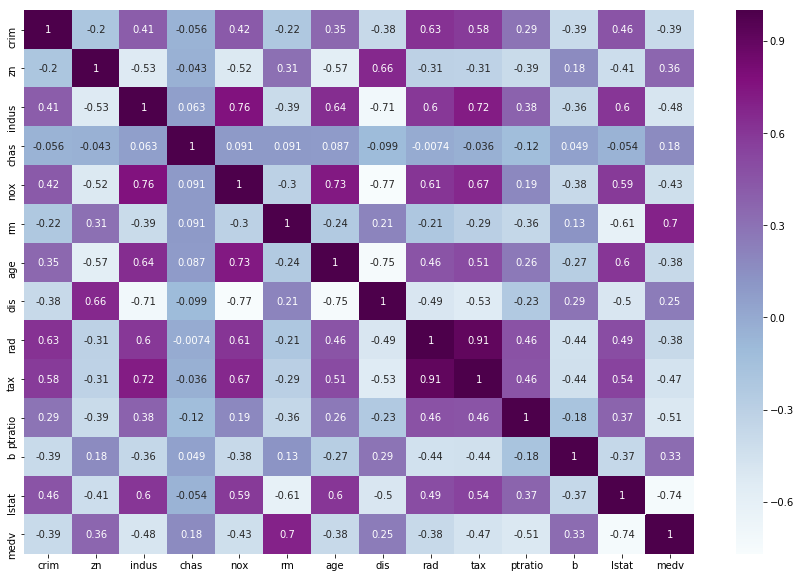

In [9]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sb.heatmap(corr, cmap="BuPu", annot=True)
corr.style.background_gradient("Blues")


#### Print Correlation Matrix with Matplotlib

In [10]:
corr = df.corr()
corr.style.background_gradient("Greens")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
indus,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
chas,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
nox,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
age,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


### Separating X and Y to start LINEAR Regression

In [11]:
#SET ONE FACTOR (column) TO X (# of rooms) and get Y variable
df_X = df["rm"]
df_y = df["medv"]

### Visualizing the data

C:\Users\mateus_silva1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

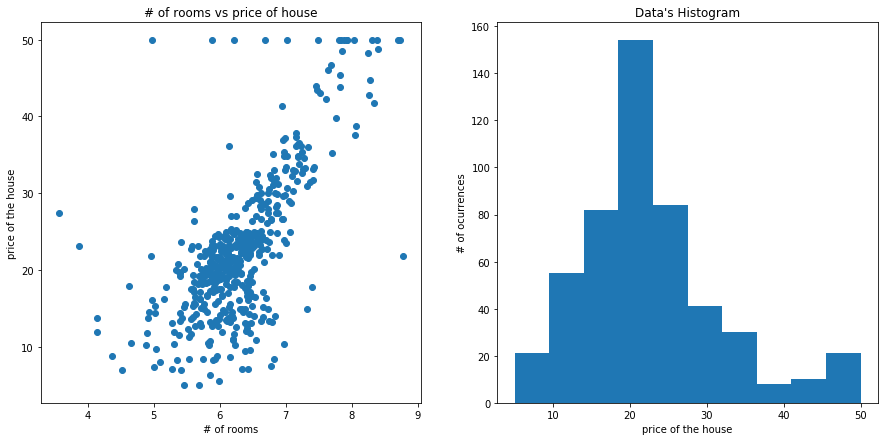

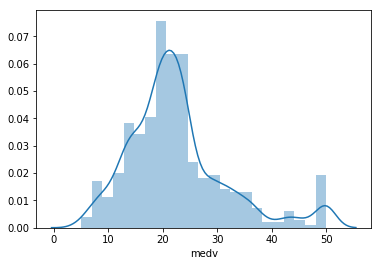

In [12]:
#SUPER SIMPLE ONE
fig = plt.figure() #create obj
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7)) #1 line and 2 columns - #create the squares
ax1.scatter(df_X,df_y) #print first chart #plot into subplots
ax2.hist(df_y) #print second chart #plot into subplots
ax1.set(xlabel='# of rooms', ylabel='price of the house', title = '# of rooms vs price of house')
ax2.set(xlabel='price of the house', ylabel='# of ocurrences', title = "Data's Histogram")
#PRINT SEABORN PLOT
plt.figure(figsize=(6,4))
plt.tight_layout()
sb.distplot(df_y)

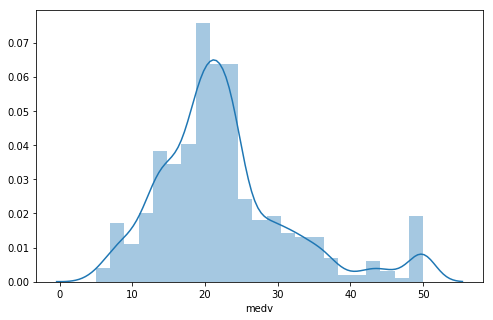

In [13]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sb.distplot(df_y)

### SPLIT DATA

In [14]:
x_train,x_test,y_train,y_test = train_test_split(df["rm"],df["medv"], test_size=0.3)

#### Taking a look at the format of the data

In [15]:
x_train.head()
#need to take index out to run the regression in "regr.fit"

217    6.642
273    7.691
73     6.245
55     7.249
442    6.219
Name: rm, dtype: float64

### Starting Regression

In [16]:
# Create linear regression object
regression = linear_model.LinearRegression()

In [17]:
#this will take the index out
#x_train = x_train[:,None]

In [18]:
# Train the model using the training sets
#without the none it give a data format problem and ask to reshape
regression.fit(x_train[:,None], y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Make predictions using the testing set
#will return array with values predicted, it will be in the same order as y_test
data_y_pred = regression.predict(x_test[:,None])

#### REGRESSION ERRORS:

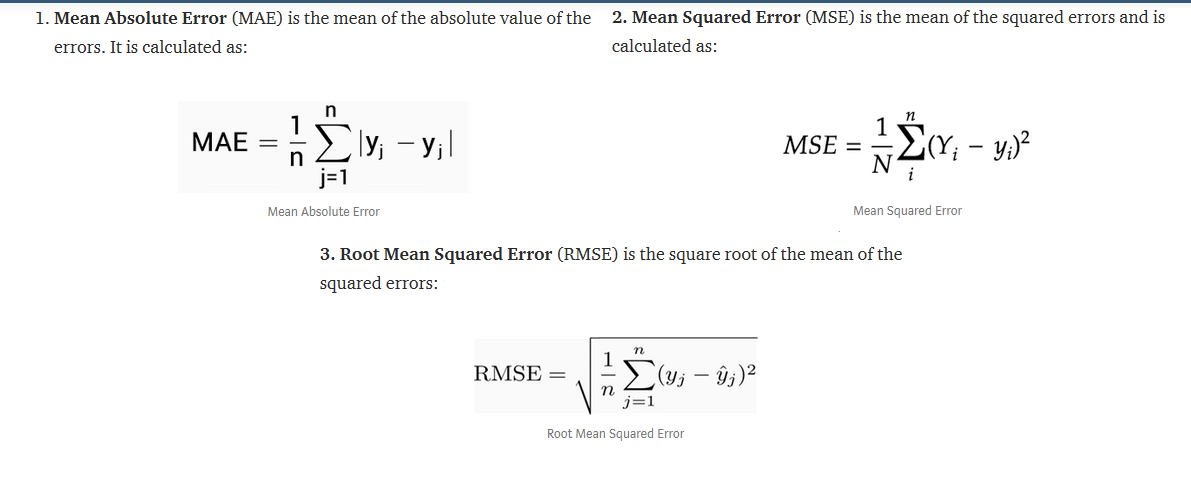

In [20]:
#loading image with code
from IPython.display import Image
Image(filename='C:/Users/mateus_silva1/Python_Jupyter_Studies/images/regression_errors.PNG')

### First look at some metrics, later on I go deeper calculating them manually

In [21]:
# The coefficient and Slope
print('Coefficient: {} and Slope: {}'.format(regression.coef_,regression.intercept_))
print('linear function is y={} + {}x'.format(regression.intercept_,regression.coef_))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, data_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: R2 %.2f' % r2_score(y_test, data_y_pred))


Coefficient: [8.65694281] and Slope: -32.054215099207084
linear function is y=-32.054215099207084 + [8.65694281]x
Mean squared error: 40.01
Variance score: R2 0.54


#### Doing some manual work to do some tests and play with the data

### Putting Y_Test and Predict_Test in a DF and Plotting IT to see Differences

In [22]:
#using dictionary to do it
df_compare = pd.DataFrame({
                           'Test Data - Original Values': y_test, 
                           'Test Data - Predicted': data_y_pred
                          })
df_compare.index.name = "Index"
#resetting index (won't be able to see the number of the house)
#df_compare = df_compare.reset_index(drop=True)
df_compare["Difference"] = df_compare["Test Data - Original Values"] - df_compare["Test Data - Predicted"]
df_compare.head()

,Test Data - Original Values,Test Data - Predicted,Difference
Index,,,
186,50.0,35.738304,14.261696
133,18.4,18.346506,0.053494
17,17.5,19.800872,-2.300872
204,50.0,37.495663,12.504337
256,44.0,32.474637,11.525363


#### Plotting Difference from real data to predicted data

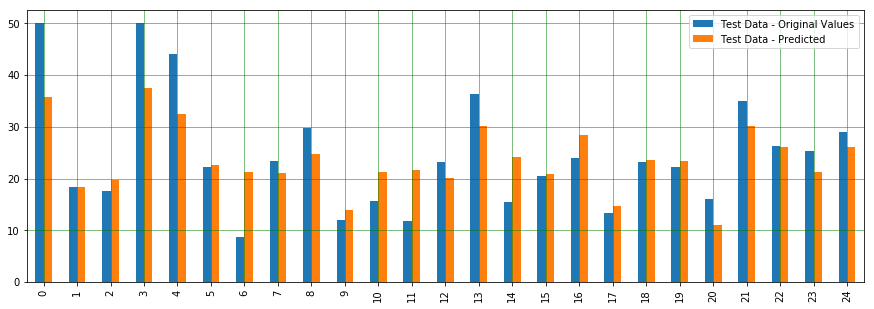

In [23]:
df1 = df_compare.head(25)
df1 = df1.reset_index(drop=True)
df1.drop(["Difference"], axis=1, inplace=True) #INPLACE = TRUE FAZ DELETAR O DATAFRAME SEM TER QUE COPIAR PRA OUTRO DF
df1.plot(kind='bar',figsize=(15,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Plotting REGRESSION for Test Data

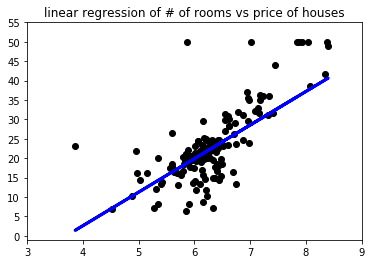

In [24]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, data_y_pred, color='blue', linewidth=3) #plotting the prediction

plt.xticks((np.arange(3,10)))
plt.yticks((np.arange(60, step=5)))
plt.title("linear regression of # of rooms vs price of houses")

plt.show()

In [25]:
# The coefficient and Slope
print('Coefficient: {} and Slope: {}'.format(regression.coef_,regression.intercept_))
#y = -30.0414 + 8.321*x

Coefficient: [8.65694281] and Slope: -32.054215099207084


### RUN THE LINEAR EQUATION (y = slope + weight*x) TO GET AN ARRAY OF PREDICTED Y's to see difference by item

In [26]:
#this is kind of redundant because data_y_pred already has this values > #data_y_pred = regression.predict(x_test[:,None])#
y_pred_manual = []
for item in x_test:
    result_pred_item = -30.0414423930087808+8.32072948*item
    y_pred_manual.append(result_pred_item)
#####Y_PRED_MANUAL HAS THE SAME VALUES AS  #data_y_pred = regression.predict(x_test[:,None])#

### transforming y_train to a dataframe to take out indexes

In [27]:
df_y_test = pd.DataFrame(y_test)
np_array_y_test = df_y_test.values


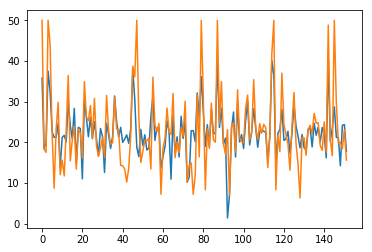

In [28]:
plt.plot(data_y_pred)
plt.plot(np_array_y_test)

### Calculate and plot difference between predicted and real value in y_test

In [29]:
difference_array = np_array_y_test - data_y_pred
diff_array = []
for item in range(152):
    result=np_array_y_test[item] - data_y_pred[item]
    diff_array.append(result)
    print ("first value in y_test is {}, prediction is {} and difference is {}".format(np_array_y_test[item],data_y_pred[item],diff_array[item]))

first value in y_test is [50.], prediction is 35.73830404855839 and difference is [14.26169595]
first value in y_test is [18.4], prediction is 18.346505942587143 and difference is [0.05349406]
first value in y_test is [17.5], prediction is 19.80087233472411 and difference is [-2.30087233]
first value in y_test is [50.], prediction is 37.495663439057225 and difference is [12.50433656]
first value in y_test is [44.], prediction is 32.47463660906055 and difference is [11.52536339]
first value in y_test is [22.3], prediction is 22.61437874808432 and difference is [-0.31437875]
first value in y_test is [8.7], prediction is 21.203297069999046 and difference is [-12.50329707]
first value in y_test is [23.3], prediction is 21.14269847032667 and difference is [2.15730153]
first value in y_test is [29.8], prediction is 24.70070196537604 and difference is [5.09929803]
first value in y_test is [12.], prediction is 13.862209566831488 and difference is [-1.86220957]
first value in y_test is [15.6], 

### Calculating squared error manually to see if it's equal to parameters from sklearn:  

#### Regression Metrics

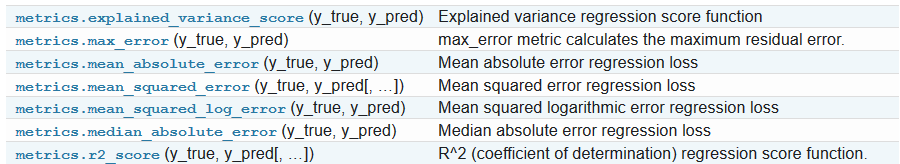

In [30]:
#loading image with code
from IPython.display import Image
Image(filename='C:/Users/mateus_silva1/Python_Jupyter_Studies/images/regression_metrics.PNG')

In [31]:
print("Explained Variance Score: %.5f" % explained_variance_score(y_test, data_y_pred))
print("R2 SCORE: %.5f" % r2_score(y_test, data_y_pred))

Explained Variance Score: 0.54912
R2 SCORE: 0.54498


#### Errors Calculated with scykit

In [32]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, data_y_pred))
print("abs squared error: %.2f" % mean_absolute_error(y_test, data_y_pred))
print("root mean squared error: %.2f" % mean_squared_error(y_test, data_y_pred))

Mean squared error: 40.01
abs squared error: 4.22
root mean squared error: 40.01


#### Errors manually calculated

In [33]:
sum_var = 0
#mae = mean absolute error
mae = 0
for item in diff_array:
    squared = item*item
    sum_var = sum_var + squared
    if item < 0:
        mae += item*-1
    else:
        mae += item
mean_absolut_error = mae / len(diff_array)
mean_squared_error_manual = sum_var / len(diff_array)
print("mean absolute error is:", mean_absolut_error)
print("mean manual squared error is:", mean_squared_error_manual)
import math
print("root manual mean square error is:", math.sqrt(mean_squared_error_manual))

mean absolute error is: [4.22337057]
mean manual squared error is: [40.00655319]
root manual mean square error is: 6.32507337451482


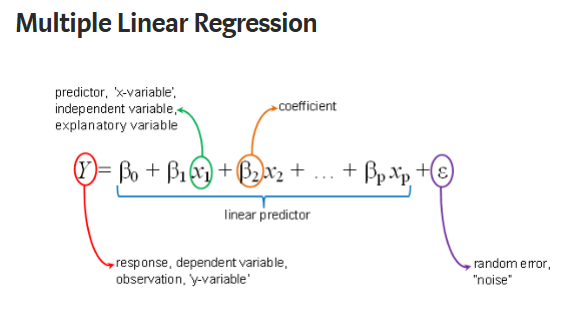

In [34]:
#loading image with code
from IPython.display import Image
Image(filename='C:/Users/mateus_silva1/Python_Jupyter_Studies/images/multiple_regression.PNG')

In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [36]:
##LOAD DATA
url = "C:/Users/mateus_silva1/Documents/Data Science/Python Scripts/winequality.csv"
dataset = pd.read_csv(url)

In [37]:
dataset.shape

(1599, 12)

### Taking a look at the data

In [38]:
wine_describe = dataset.describe()

#plt.plot(wine_describe.iloc[1:,:])
wine_describe = wine_describe.T
wine_describe.index.name = 'variables'
wine_describe

,count,mean,std,min,25%,50%,75%,max
variables,,,,,,,,
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000


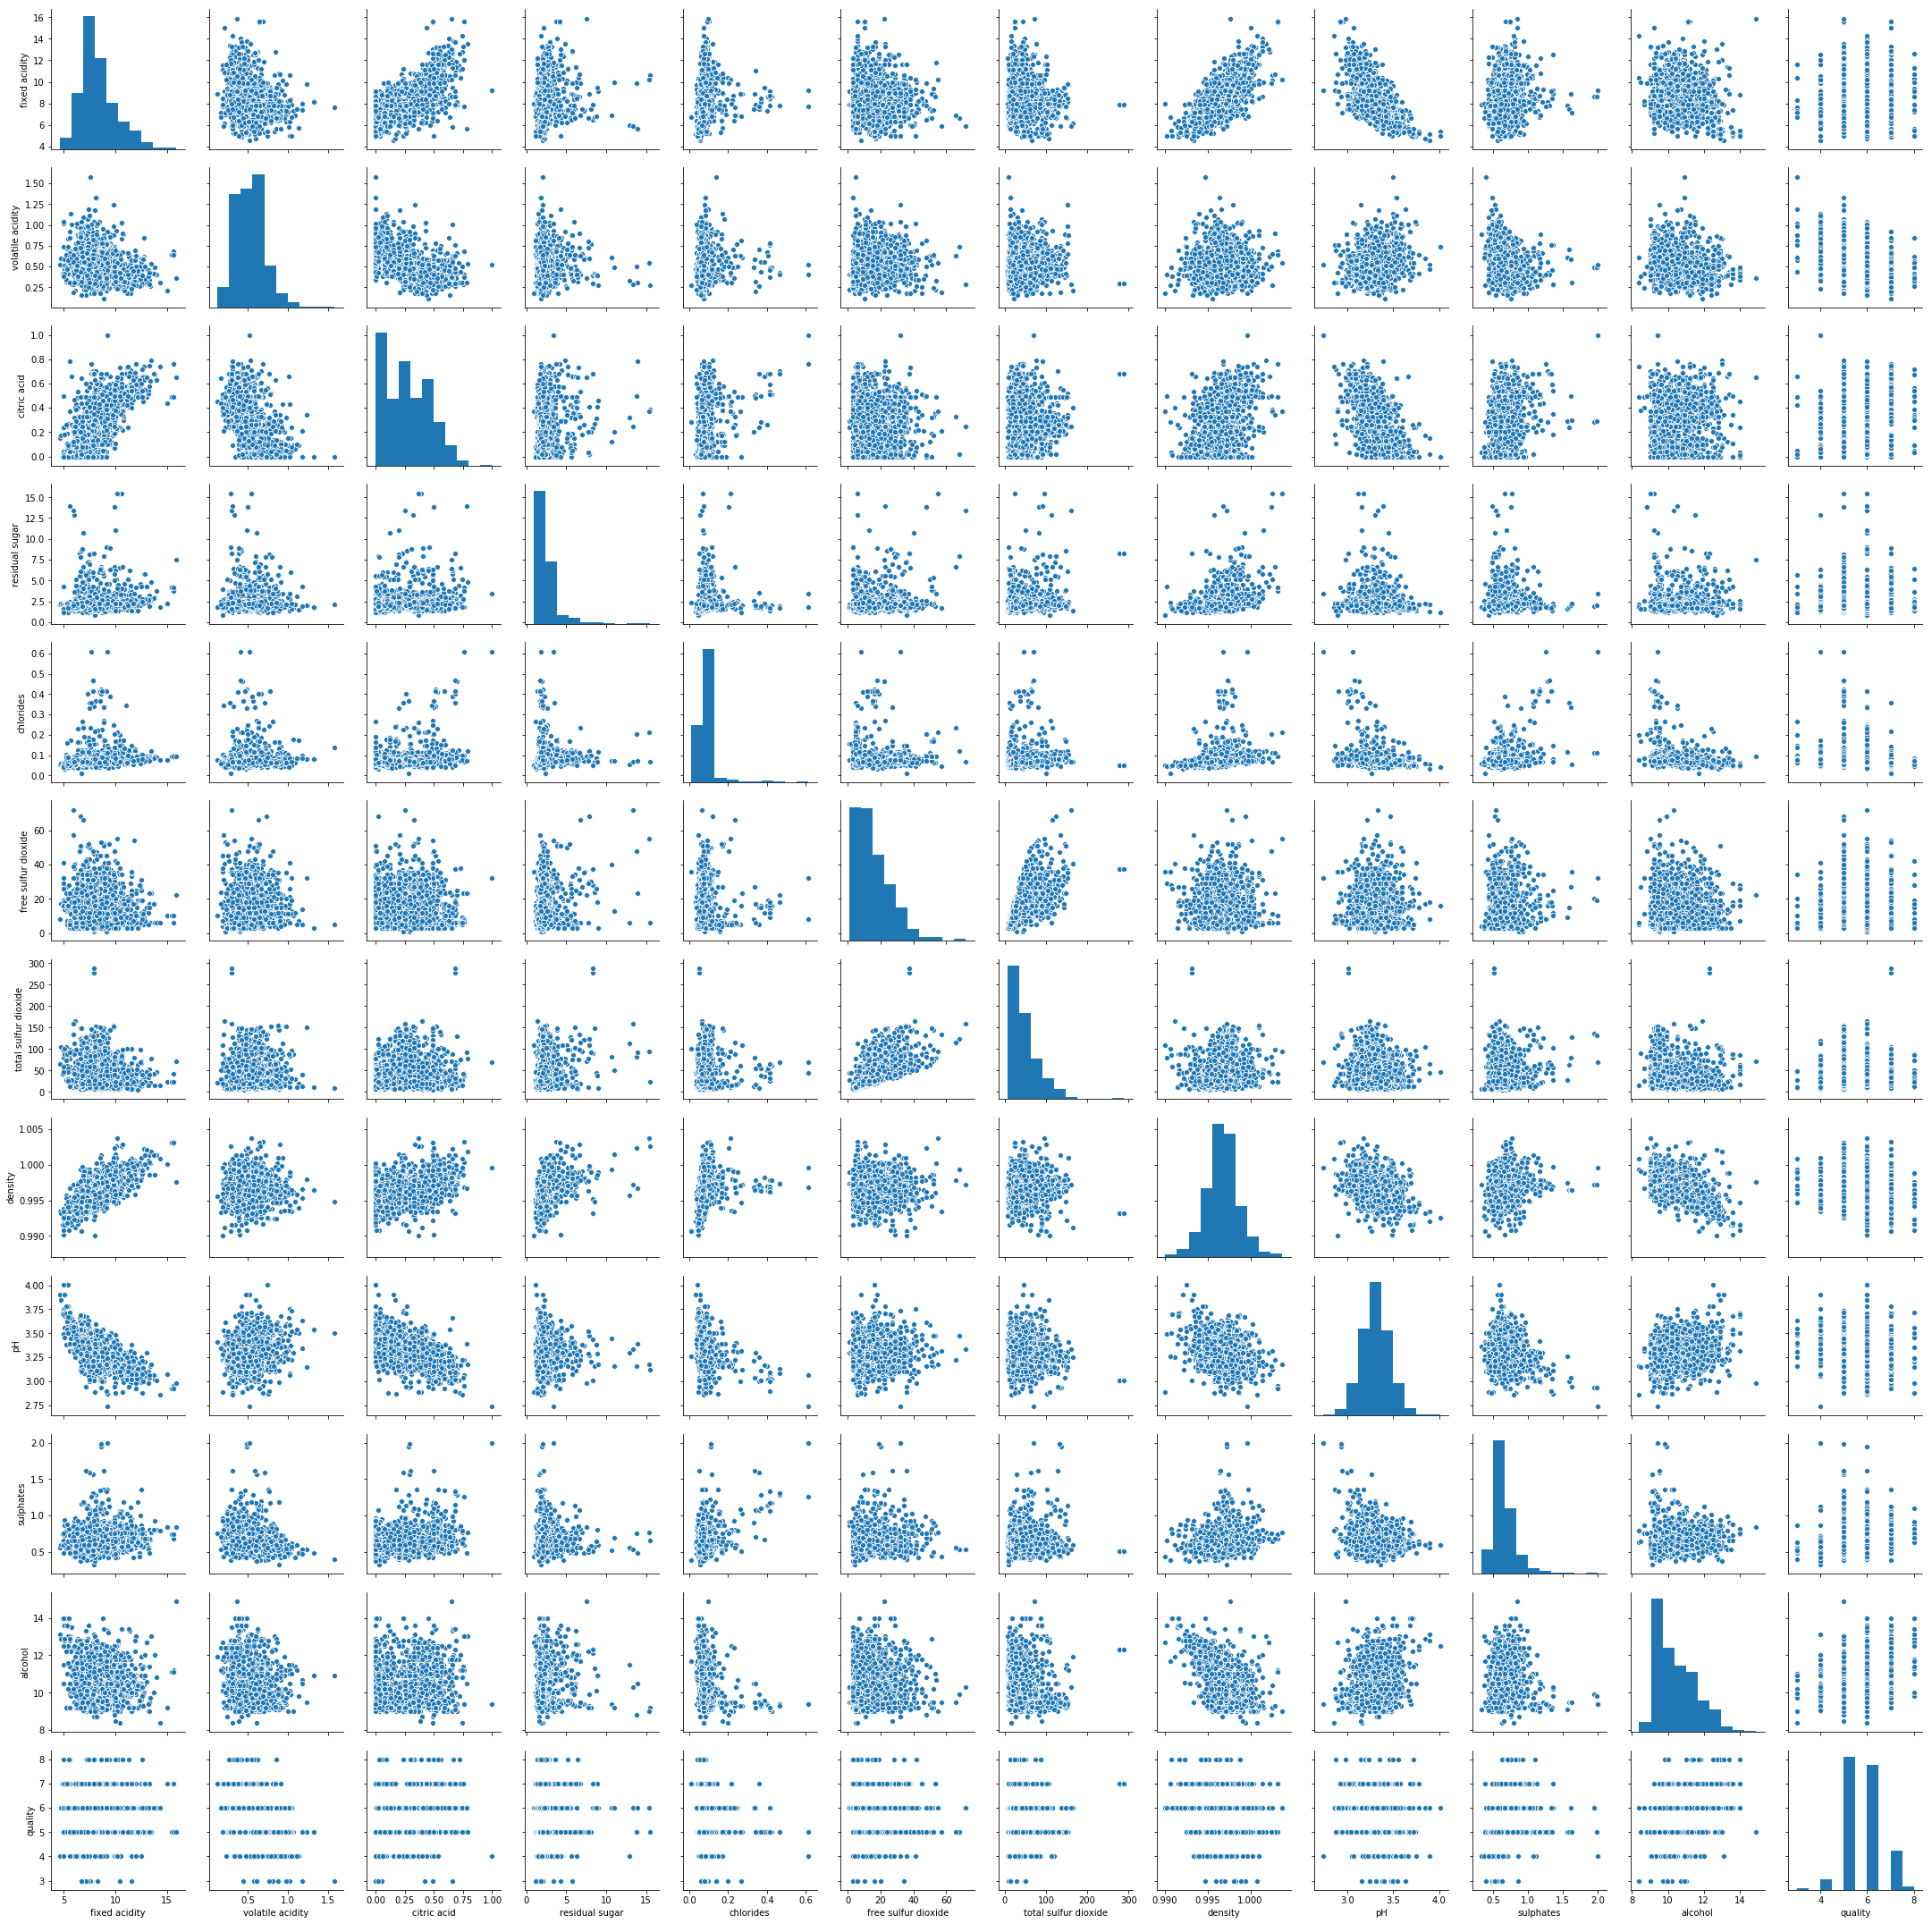

In [39]:
sb.pairplot(dataset)
plt.show()

[Text(0, 0, 'fixed acidity'),
 Text(0, 0, 'volatile acidity'),
 Text(0, 0, 'citric acid'),
 Text(0, 0, 'residual sugar'),
 Text(0, 0, 'chlorides'),
 Text(0, 0, 'free sulfur dioxide'),
 Text(0, 0, 'total sulfur dioxide'),
 Text(0, 0, 'density'),
 Text(0, 0, 'pH'),
 Text(0, 0, 'sulphates'),
 Text(0, 0, 'alcohol'),
 Text(0, 0, 'quality')]

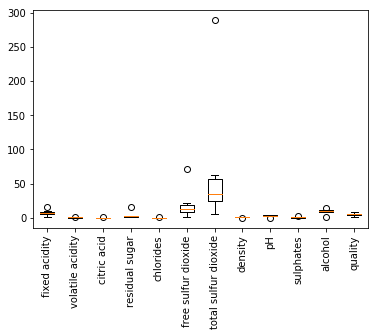

In [40]:
# Multiple box plots on one Axes (to see distribution of variables)
fig, ax = plt.subplots()
ax.boxplot(wine_describe.iloc[:,2:])
ax.set_xticklabels(wine_describe.index, rotation="vertical")

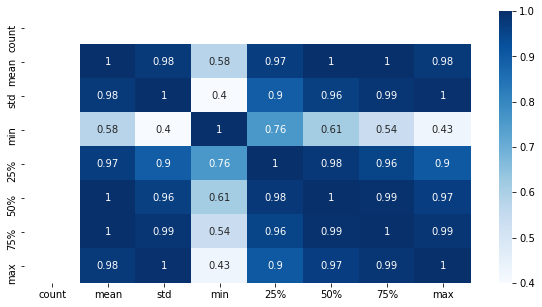

In [41]:
#SEABORN HEATMAP
plt.show()
#heatmap
corr_wine = wine_describe.corr()
plt.figure(figsize=(10, 5))
sb.heatmap(corr_wine, annot=True, cmap="Blues")

### Cleaning NAs

In [42]:
dataset.isnull().any()
#taking NAs out
dataset = dataset.fillna(method='ffill')

### DIVIDE DATA BETWEEN VARIABLES AND TARGET: using numpy arrays now, not dataframes

In [43]:
x_wine = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates','alcohol']].values
y_wine = dataset['quality'].values



#### Check avg. value of "quality (y)" target variable

C:\Users\mateus_silva1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


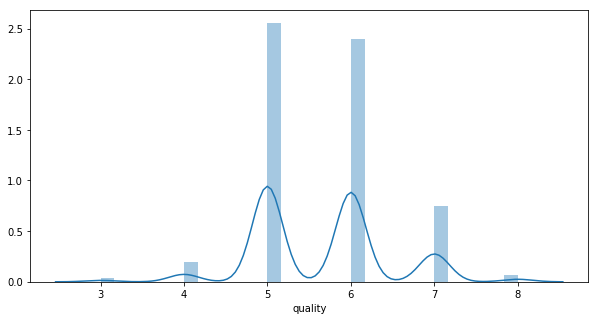

In [44]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sb.distplot(dataset['quality'])

### SPLIT DATA

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.2, random_state=0)

### Train the Model

In [46]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Seeing coefficients for many variables and slope

the coefficients are: 

                       Coefficient
fixed acidity            0.041284
volatile acidity        -1.149528
citric acid             -0.177927
residual sugar           0.027870
chlorides               -1.873407
free sulfur dioxide      0.002684
total sulfur dioxide    -0.002777
density                -31.516666
pH                      -0.254486
sulphates                0.924040
alcohol                  0.267797


the slope is:  34.9987106287214
bar chart of the coefficients: 



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

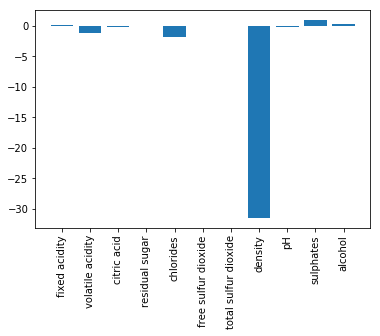

In [47]:
#just getting the columns I need from a df (creating df first)
x_wine_to_columns = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates','alcohol']]
coeff_df = pd.DataFrame(regressor.coef_, x_wine_to_columns.columns, columns=['Coefficient'])  
print("the coefficients are: \n\n",coeff_df)
#unit increase in density equals to 31 decrease in quality
print("\n\nthe slope is: ",regressor.intercept_)
print("bar chart of the coefficients: \n")
plt.bar(coeff_df.index,coeff_df["Coefficient"])
plt.xticks(rotation=90)

### PREDICT WITH THE TEST SET

In [48]:
y_pred = regressor.predict(X_test)

#### Check differences between actual and predicted values

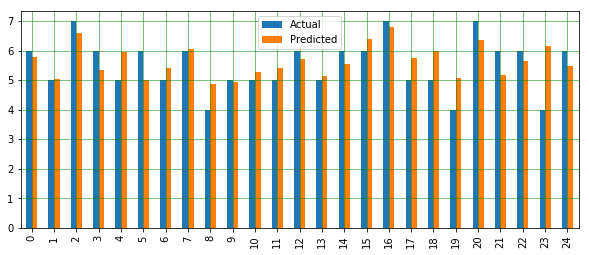

In [49]:
#PUTTING ACTUAL VALUE AND DIFFERENCES IN A DATAFRAME
df_diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
differences_wine_25sample = df_diff.head(25)
#PLOT DIFFERENCES
differences_wine_25sample.plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### CHECKING PERFORMANCE METRICS (first taking a look at the quality (y) variable)

Mean Absolute Error: 0.46963309286611005
Mean Squared Error: 0.3844711978201237
Root Mean Squared Error: 0.6200574149384263


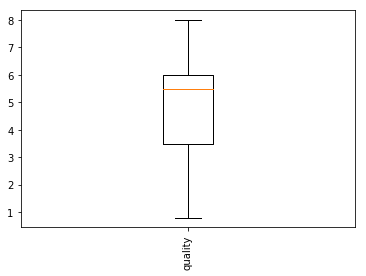

In [50]:
#box plots on one Axes (to see distribution of TARGET Variable)
fig, ax = plt.subplots()
ax.boxplot(wine_describe.iloc[-1,2:])
ax.set_xticklabels(["quality"], rotation="vertical")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#ROOT SQUARED ERROR IS 10% BIGGER THAN MEAN OF Y VARIABLE: not very accurate, but not that bad.

## PCA AND REGRESSION WITH PCRegression Library

In [51]:
import PCRegression as pcr
from PCRegression import *

In [52]:
##LOAD DATA
url = "C:/Users/mateus_silva1/Documents/Data Science/Python Scripts/winequality.csv"
dataset = pd.read_csv(url)
dataset.isnull().any()
#taking NAs out
dataset = dataset.fillna(method='ffill')
x_wine = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates','alcohol']].values
y_wine = dataset['quality'].values

### SPLITTING AND DOING PCA

In [53]:
X_train, X_test , y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.2, random_state=1)
pcr = PCR(n_components = 4)
pcr.fit(scale(X_train), y_train) # Scale your predictors for best results.
predictions = pcr.predict(scale(X_test))
pcr

PCR(copy=True, copy_X=True, fit_intercept=True, iterated_power='auto',
  n_components=4, n_jobs=1, normalize=False,
  random_state=RandomState(MT19937) at 0x27BCA1EE468, svd_solver='auto',
  tol=0.0, whiten=False)

In [54]:
mse_c = mean_squared_error(predictions, y_test)
mse_c = mean_squared_error(predictions, y_test)
print(mse_c)

0.40072085226854914


### Seeing differences

diff from predicted w pcr sum:  -23.16262705242088
diff from normal multiv prediction:  -27.814994322432625


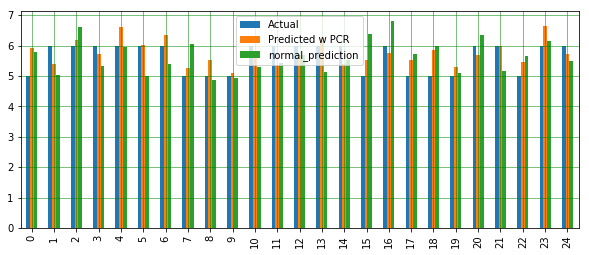

In [55]:
#PUTTING ACTUAL VALUE AND DIFFERENCES IN A DATAFRAME
#normal prediction is from 2nd model in this page
df_diff = pd.DataFrame({'Actual': y_test, 'Predicted w PCR': predictions, 'normal_prediction': y_pred })
df_diff["diff from pcr"] = df_diff["Actual"] - df_diff["Predicted w PCR"]
df_diff["diff from multivariate"] = df_diff["Actual"] - df_diff["normal_prediction"]
differences_wine_25sample = df_diff.head(25)
print("diff from predicted w pcr sum: ", df_diff["diff from pcr"].sum())
print("diff from normal multiv prediction: ", df_diff["diff from multivariate"].sum())
#PLOT DIFFERENCES
differences_wine_25sample.iloc[:,:3].plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [56]:
df_diff.head()

,Actual,Predicted w PCR,normal_prediction,diff from pcr,diff from multivariate
0,5,5.923923,5.782930,-0.923923,-0.782930
1,6,5.410337,5.036193,0.589663,0.963807
2,6,6.196772,6.596989,-0.196772,-0.596989
3,6,5.725211,5.339126,0.274789,0.660874
4,6,6.597834,5.939529,-0.597834,0.060471


## GLM (Generalized Linear Models) with  H2o

In [57]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

from h2o.estimators.gbm import H2OGradientBoostingEstimator

from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import pandas as pd
import numpy as np
import h2o
import csv

import h2o
import numpy as np
import pandas as pd
import urllib #data libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import urllib.request
from h2o.automl import H2OAutoML

In [58]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from C:\Users\mateus_silva1\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MATEUS~1\AppData\Local\Temp\tmpjawk3afe
  JVM stdout: C:\Users\MATEUS~1\AppData\Local\Temp\tmpjawk3afe\h2o_Mateus_S_Leao_started_from_python.out
  JVM stderr: C:\Users\MATEUS~1\AppData\Local\Temp\tmpjawk3afe\h2o_Mateus_S_Leao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/Mexico_City
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_Mateus_S_Leao_36n2fi
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [59]:
##LOAD DATA
url = "C:/Users/mateus_silva1/Documents/Data Science/Python Scripts/winequality.csv"
data_sample = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [60]:
data_split = data_sample.split_frame(ratios = [0.8], seed = 1234)
data_train = data_split[0] # using 80% for training
data_test = data_split[1] #rest 20% for testing
predictors = list(data_sample.columns)
predictors.remove('quality')
predictors

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [61]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y='quality', training_frame=data_train, validation_frame=data_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [62]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20191022_180725,0.331145,0.575452,0.331145,0.414615,0.089272
StackedEnsemble_AllModels_AutoML_20191022_180725,0.331483,0.575745,0.331483,0.415796,0.0893049
XRT_1_AutoML_20191022_180725,0.334037,0.577959,0.334037,0.419006,0.0898612
DRF_1_AutoML_20191022_180725,0.335269,0.579024,0.335269,0.421322,0.0898346
GBM_4_AutoML_20191022_180725,0.345794,0.588042,0.345794,0.43737,0.0910419
GBM_2_AutoML_20191022_180725,0.354478,0.595381,0.354478,0.447942,0.0920959
GBM_3_AutoML_20191022_180725,0.356351,0.596951,0.356351,0.445618,0.0924365
GBM_1_AutoML_20191022_180725,0.372667,0.610465,0.372667,0.449573,0.0943823
GBM_5_AutoML_20191022_180725,0.390384,0.624807,0.390384,0.478007,0.0961757
GLM_grid_1_AutoML_20191022_180725_model_1,0.415696,0.644745,0.415696,0.499326,0.0989162


In [63]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])


In [64]:
metalearner.coef_norm()

{'Intercept': 5.638198757763976,
 'XRT_1_AutoML_20191022_180725': 0.22431826458667817,
 'DRF_1_AutoML_20191022_180725': 0.19822995271415791,
 'GBM_4_AutoML_20191022_180725': 0.11042513697605964,
 'GBM_2_AutoML_20191022_180725': 0.0,
 'GBM_3_AutoML_20191022_180725': 0.0,
 'GBM_1_AutoML_20191022_180725': 0.0,
 'GBM_5_AutoML_20191022_180725': 0.0,
 'GLM_grid_1_AutoML_20191022_180725_model_1': 0.0,
 'DeepLearning_1_AutoML_20191022_180725': 0.0,
 'GBM_grid_1_AutoML_20191022_180725_model_1': 0.0,
 'DeepLearning_grid_1_AutoML_20191022_180725_model_3': 0.0,
 'DeepLearning_grid_1_AutoML_20191022_180725_model_1': 0.0,
 'GBM_grid_1_AutoML_20191022_180725_model_3': 0.0,
 'DeepLearning_grid_1_AutoML_20191022_180725_model_2': 0.0,
 'DeepLearning_grid_1_AutoML_20191022_180725_model_4': 0.02363311970831315,
 'GBM_grid_1_AutoML_20191022_180725_model_2': 0.0,
 'GBM_grid_1_AutoML_20191022_180725_model_5': 0.0,
 'GBM_grid_1_AutoML_20191022_180725_model_6': 0.0,
 'GBM_grid_1_AutoML_20191022_180725_model_4'

C:\Users\mateus_silva1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\mateus_silva1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\mateus_silva1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


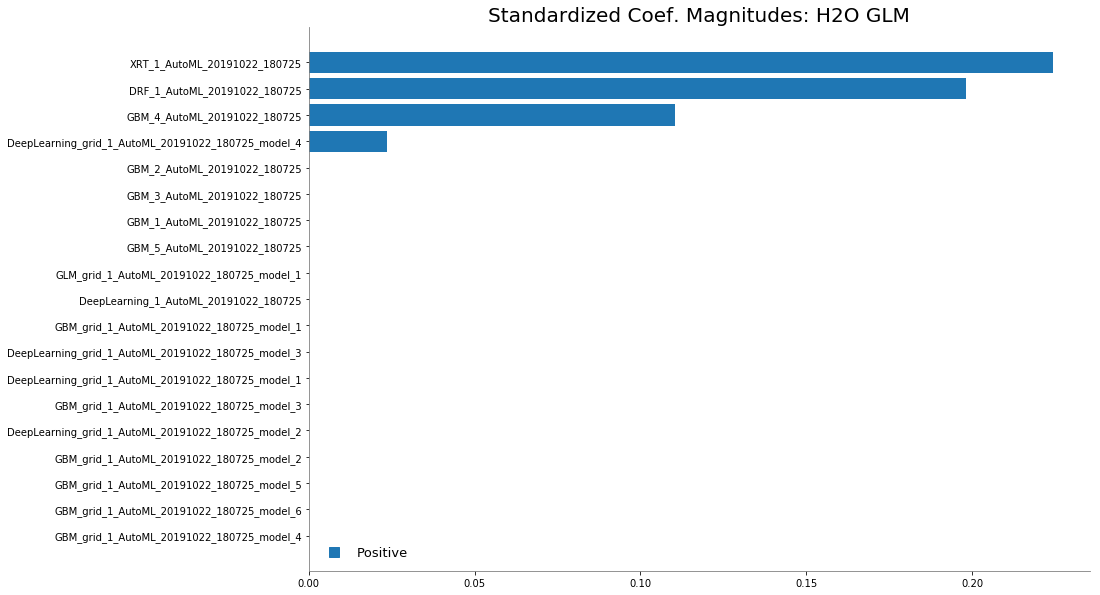

In [65]:
%matplotlib inline
metalearner.std_coef_plot()